# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist

from keras.callbacks import EarlyStopping

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [ ]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((3000, 784), (3000,))

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

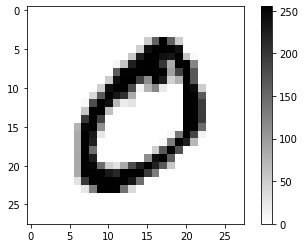

In [ ]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

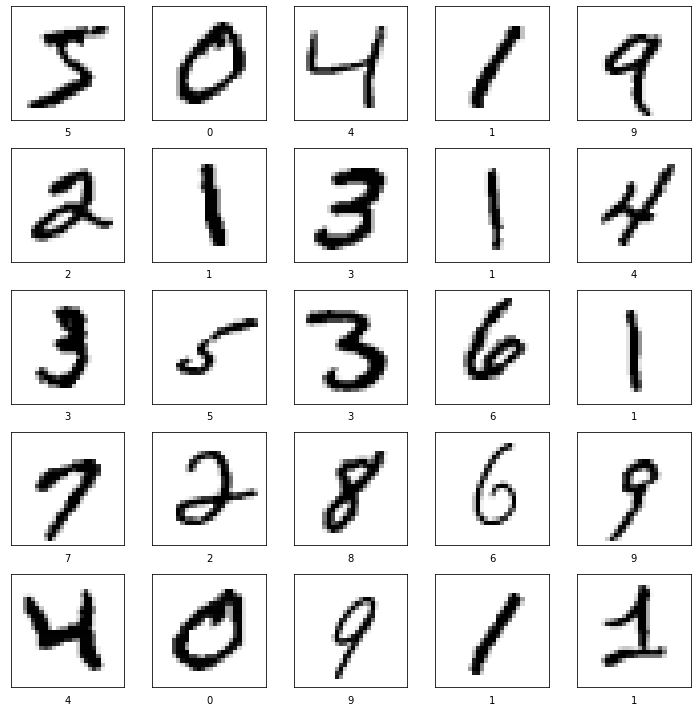

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [ ]:
x_train = x_train[:3000]
y_train = y_train[:3000]

x_val = x_val[:1000]
y_val = y_val[:1000]

In [ ]:
x_train.shape, x_val.shape

((3000, 784), (1000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링 : 과적합

### (1) 학습

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

784

In [ ]:
clear_session()

model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2).history

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 1.6058 - val_loss: 1.0510
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.8574 - val_loss: 0.7328
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6406 - val_loss: 0.5984
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5353 - val_loss: 0.5291
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.4737 - val_loss: 0.4803
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 0.4296 - val_loss: 0.4547
Epoch 7/100
75/75 [==============================] - 0s 4ms/step - loss: 0.3967 - val_loss: 0.4349
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3684 - val_loss: 0.4155
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3465 - val_loss: 0.4015
Epoch 10/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3289 - val_loss: 0.3907
Epoch 11/

### (2) 학습결과 그래프

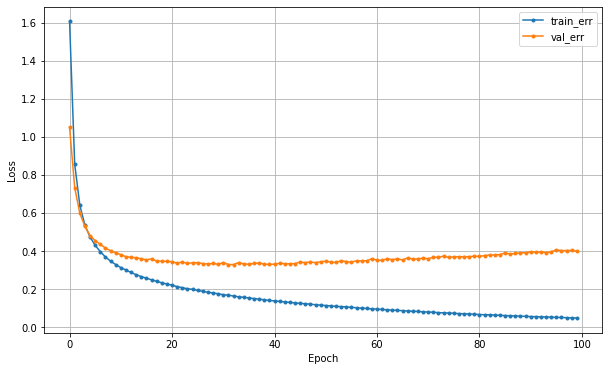

In [ ]:
dl_history_plot(history)

* epoch가 약 40 근방에서 val_err가 다시 높아지기 시작합니다.

### (3) 예측 및 평가

In [ ]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

32/32 [==============================] - 0s 1ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print('='*70)
print(classification_report(y_val, pred_1))

[[ 83   0   1   0   0   0   1   0   0   0]
 [  0 124   0   1   0   0   1   0   0   0]
 [  0   1  96   3   0   1   1   4   8   2]
 [  1   0   2  88   0   7   2   2   4   1]
 [  1   0   0   0  99   0   2   0   2   6]
 [  0   0   2   4   2  72   1   1   4   1]
 [  2   0   2   0   1   4  77   1   0   0]
 [  0   2   6   1   1   1   0  82   0   6]
 [  1   0   3   3   4   3   1   4  69   1]
 [  0   0   1   2   6   0   0   6   1  78]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        85
           1       0.98      0.98      0.98       126
           2       0.85      0.83      0.84       116
           3       0.86      0.82      0.84       107
           4       0.88      0.90      0.89       110
           5       0.82      0.83      0.82        87
           6       0.90      0.89      0.89        87
           7       0.82      0.83      0.82        99
           8       0.78      0.78      0.78        89
           9       0.82     

## 5.모델링 : 과적합 방지

### (1) EarlyStopping 설정

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0)

### (2) 모델 선언 및 학습

In [ ]:
model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 100, validation_split = .2, callbacks = [es]).history

Epoch 1/100
75/75 [==============================] - 2s 5ms/step - loss: 1.5952 - val_loss: 1.0439
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8413 - val_loss: 0.7224


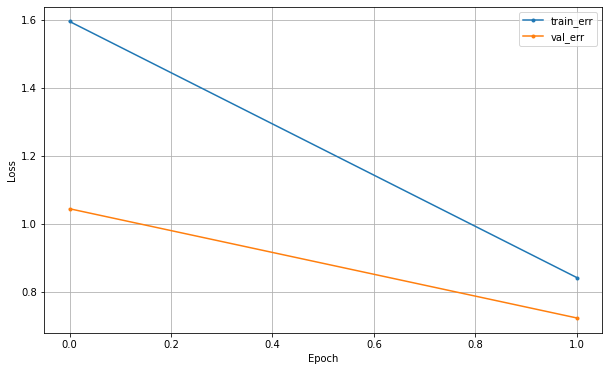

In [ ]:
dl_history_plot(history)

## 6.실습

* min_delta와 patience를 조절해 봅시다.

In [ ]:
# 아래 두 값 변경시켜보기
md = 0.01
pa = 5

es = EarlyStopping(monitor = 'val_loss', min_delta = md, patience = pa)

model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 100, validation_split = .2, callbacks = [es]).history

Epoch 1/100
75/75 [==============================] - 1s 6ms/step - loss: 1.4810 - val_loss: 0.9880
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8158 - val_loss: 0.6933
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.6174 - val_loss: 0.5764
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.5201 - val_loss: 0.5083
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4597 - val_loss: 0.4691
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4188 - val_loss: 0.4437
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3863 - val_loss: 0.4212
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3627 - val_loss: 0.4052
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3412 - val_loss: 0.3981
Epoch 10/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3227 - val_loss: 0.3854
Epoch 11/

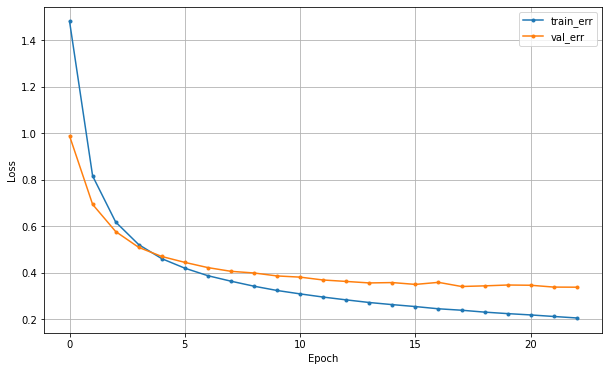

In [ ]:
dl_history_plot(history)

In [ ]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

32/32 [==============================] - 0s 2ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print('='*70)
print(classification_report(y_val, pred_1))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 124   0   1   0   0   1   0   0   0]
 [  1   1  98   3   0   0   1   4   6   2]
 [  0   0   1  92   0   8   2   1   2   1]
 [  1   0   0   0  98   0   2   0   1   8]
 [  1   0   1   2   2  71   2   4   2   2]
 [  2   0   1   0   1   1  81   1   0   0]
 [  0   2   6   1   2   0   0  83   0   5]
 [  1   1   3   8   2   2   1   3  66   2]
 [  0   0   0   2   6   0   0   3   2  81]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        85
           1       0.97      0.98      0.98       126
           2       0.89      0.84      0.87       116
           3       0.84      0.86      0.85       107
           4       0.88      0.89      0.89       110
           5       0.87      0.82      0.84        87
           6       0.89      0.93      0.91        87
           7       0.84      0.84      0.84        99
           8       0.84      0.74      0.79        89
           9       0.80     

## 7.모델 저장하기

### (1) 모델 저장하기

* model.save(‘파일이름.h5’)
    * 딥러닝 모델의 메소드로 .save가 제공됩니다.
    * 파일이름.h5 파일이 저장됩니다. (h5 파일 포맷 : 하둡파일 형식)

In [ ]:
model.save('mnist_model.h5')

* 저장된 파일은 왼쪽 '파일'탭에서 확인 가능
* 파일을 다운로드 받을 수 있다.

### (2) 모델 로딩하기

* load_model 함수는 별도로 불러와야 합니다.
* 경로를 맞춰주고 h5 파일을 읽어오면 그대로 사용 가능합니다.

In [ ]:
from keras.models import load_model
model2 = load_model('mnist_model.h5')

* 불러온 모델 사용하기

In [ ]:
pred2 = model2.predict(x_test)

32/32 [==============================] - 0s 1ms/step


In [ ]:
pred2_1 = pred2.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred2_1))
print('-'*60)
print(confusion_matrix(y_val, pred2_1))
print('-'*60)
print(classification_report(y_val, pred2_1))

0.878
------------------------------------------------------------
[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 124   0   1   0   0   1   0   0   0]
 [  1   1  98   3   0   0   1   4   6   2]
 [  0   0   1  92   0   8   2   1   2   1]
 [  1   0   0   0  98   0   2   0   1   8]
 [  1   0   1   2   2  71   2   4   2   2]
 [  2   0   1   0   1   1  81   1   0   0]
 [  0   2   6   1   2   0   0  83   0   5]
 [  1   1   3   8   2   2   1   3  66   2]
 [  0   0   0   2   6   0   0   3   2  81]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        85
           1       0.97      0.98      0.98       126
           2       0.89      0.84      0.87       116
           3       0.84      0.86      0.85       107
           4       0.88      0.89      0.89       110
           5       0.87      0.82      0.84        87
           6       0.89      0.93      0.91        87
        